In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:

df = pd.read_csv("generated_dataset.csv")
df

,x,y
0,5.135889,-2.862346
1,6.506228,-1.386944
2,5.625100,-2.808703
3,5.306448,-3.204297
4,5.210431,-2.776417
...,...,...
295,9.759568,3.905837
296,9.399271,5.273777
297,8.938098,4.135821
298,8.334630,5.701751


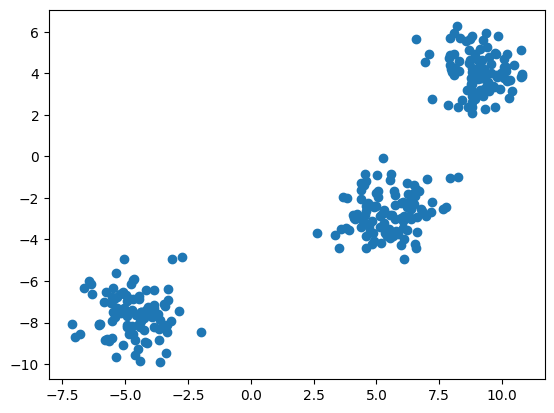

In [6]:
X = df["x"]
Y = df["y"]
plt.scatter(X, Y)

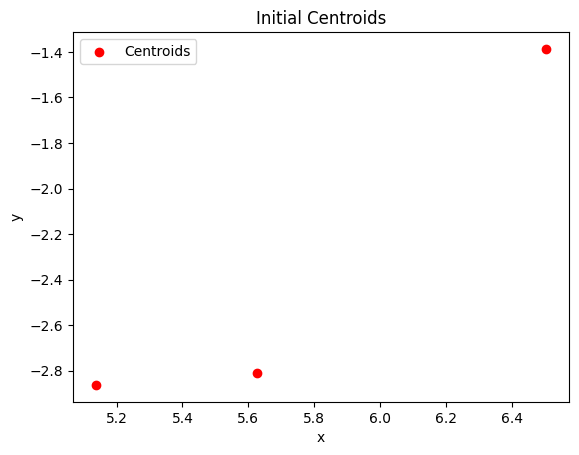

In [7]:
# Initialize K (number of clusters)
K = 3
N = len(df)  # Number of data points
df["cluster"] = -1  # Initialize cluster column with -1 (unassigned)

# Initialize random centroids (S) from the first K points
S_temp = [[float(df["x"][i]), float(df["y"][i])] for i in range(K)]
S = np.array(S_temp)

# Plot initial centroids
plt.scatter(S[:, 0], S[:, 1], color='red', label='Centroids')
plt.title("Initial Centroids")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("InitialCentroids.png")
plt.show()


In [8]:
def EuclideanDistance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# K-means algorithm loop
while True:
    prev_cluster = df["cluster"].copy()  # Save previous cluster assignments for comparison
    Total = 0  # Total distance (sum of distances to centroids)

    # Assign points to the nearest cluster
    for i in range(N):
        min_distance = float('inf')  # Start with a large value
        min_index = -1
        for j in range(K):
            # Compute Euclidean distance to each centroid
            distance = EuclideanDistance(df["x"][i], df["y"][i], S[j][0], S[j][1])
            if distance < min_distance:
                min_distance = distance
                min_index = j
        # Update cluster assignment
        df.loc[i, "cluster"] = min_index
        Total += min_distance

    # Update centroids (mean of points assigned to each cluster)
    for j in range(K):
        cluster_points = df[df["cluster"] == j]
        if len(cluster_points) > 0:  # Avoid empty clusters
            S[j] = [cluster_points["x"].mean(), cluster_points["y"].mean()]

    # Check for convergence (if cluster assignments don't change)
    if (df["cluster"] == prev_cluster).all():
        break

    print("Total distance:", Total)

Total distance: 1802.4934362813049
Total distance: 649.4707823121718


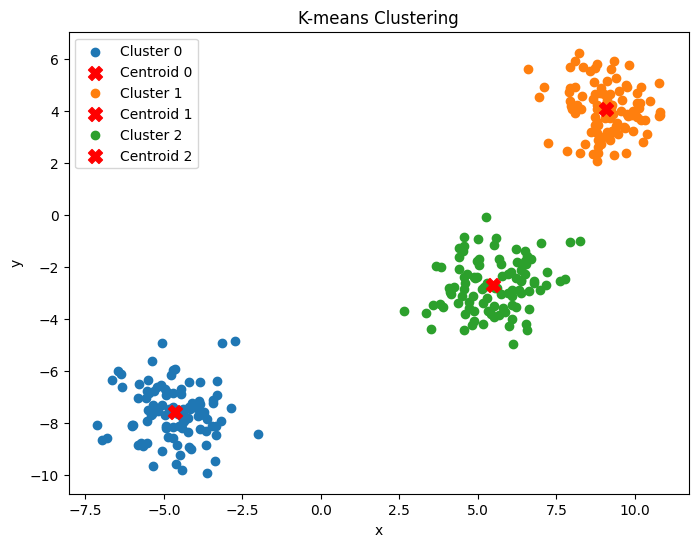

In [9]:

plt.figure(figsize=(8, 6))
for j in range(K):
    cluster_points = df[df["cluster"] == j]
    plt.scatter(cluster_points["x"], cluster_points["y"], label=f'Cluster {j}')
    plt.scatter(S[j][0], S[j][1], color='red', marker='X', s=100, label=f'Centroid {j}')

plt.title("K-means Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("clustering.png")
plt.show()